In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bcs=pd.read_csv('usher_barcodes.csv') # load barcode dataset
bcs.head()

,Unnamed: 0,A10037G,A10042C,A10042G,A10075G,A10108G,A10124G,A10132T,A1015C,A10260G,...,A23013G,A27383C,A27507T,A5584T,C14408G,C22674A,G22895T,G27382T,T22200A,A23013T
0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,B.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,B.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,B.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,B.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
n=bcs.shape[0] # the number of observations/variants in the table

# Sampling of variants using `pd.DataFrame.sample()`

In [4]:
bcs.sample(n=10000, replace=True, random_state=42, axis=0).head() 
#n for amount of samples, replace=True to allow sampling of single index more tan once

,Unnamed: 0,A10037G,A10042C,A10042G,A10075G,A10108G,A10124G,A10132T,A1015C,A10260G,...,A23013G,A27383C,A27507T,A5584T,C14408G,C22674A,G22895T,G27382T,T22200A,A23013T
3174,XBB.2.3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3507,LE.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
860,B.1.428.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1294,BA.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1130,B.1.177.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


***Sampling with parameters:***
- `pd.DataFrame.sample()` has a `weights` argument
- default `weights=None` samples with equal probability weighting
- since the sampling is called on index (`axis=0`), specifying `weights` with a specific column name result in rows with larger values in the specified column more likely to be sampled
- a different sampling approach instead?

# Calculate the SNV frequencies across sites

In [5]:
snvs=bcs.drop('Unnamed: 0', axis=1) # save the SNVs as a new DataFrame
snvs.head()

,A10037G,A10042C,A10042G,A10075G,A10108G,A10124G,A10132T,A1015C,A10260G,A10286G,...,A23013G,A27383C,A27507T,A5584T,C14408G,C22674A,G22895T,G27382T,T22200A,A23013T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
snv_freqs=[] # initialise an empty list

for i in range(snvs.shape[1]):
    snv_freqs.append(snvs.iloc[:,i].sum()/n) # store each individual SNV's frequency into the list

In [7]:
# print(snv_freqs) # uncomment this to view the SNV frequencies stored as a list

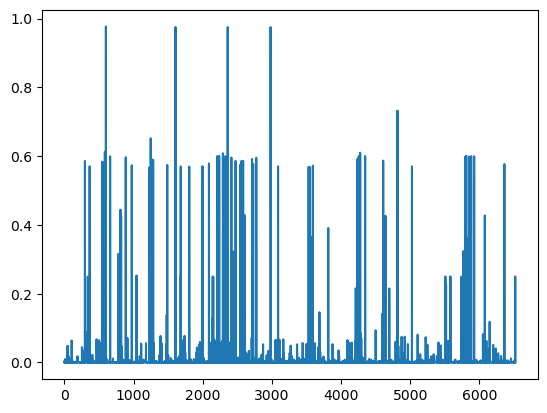

In [8]:
plt.plot(snv_freqs);